<a href="https://colab.research.google.com/github/didi-d92/Service-prediction-with-logistic-regression-/blob/main/EDA_Bankdeposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [743]:
import pandas as pd

In [744]:
bank_df= pd.read_csv('/content/bank.csv')

In [745]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [746]:
Data= bank_df.copy()

In [747]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#Cleaning Data

In [748]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Duplicates

In [749]:
duplicados_filas = Data.duplicated().sum()
print(f'Total de filas duplicadas: {duplicados_filas}')

Total de filas duplicadas: 0


In [750]:
duplicados_columnas = Data.columns.duplicated().sum()
print(f'Total de columnas duplicadas: {duplicados_columnas}')

Total de columnas duplicadas: 0


Nule values

In [751]:
Data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Deposit

In [752]:
print(Data['deposit'].unique())

['yes' 'no']


In [753]:
print(Data['deposit'].isnull().sum())

0


In [754]:
Data['deposit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
11162 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [755]:
Data['deposit'] = Data['deposit'].map({'yes': 1, 'no': 0})

In [756]:
Data['deposit'].unique()

array([1, 0])

In [757]:
Data['deposit'].value_counts()

,count
deposit,
0,5873
1,5289


In [758]:
import seaborn as sns

In [759]:
import matplotlib.pyplot as plt

<ipython-input-760-f5127dc2570c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=Data, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


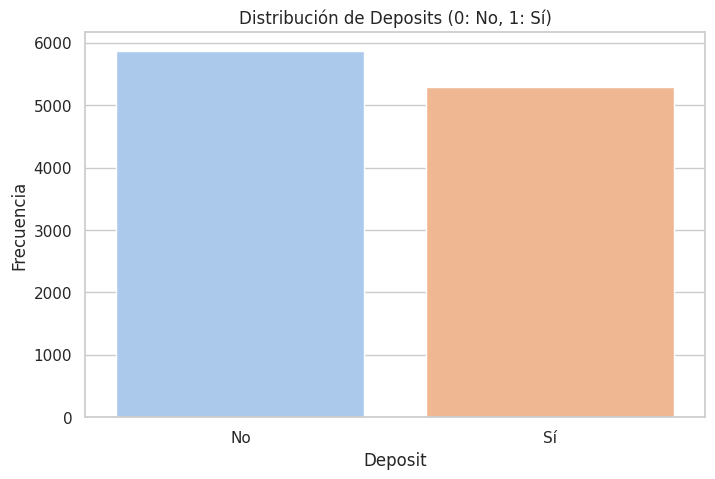

In [760]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='deposit', data=Data, palette='pastel')
plt.title('Distribución de Deposits (0: No, 1: Sí)')
plt.xlabel('Deposit')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

Age

In [761]:
Data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [762]:
Data['age'].isnull().sum()

0

In [763]:
Data['age'].min()

18

In [764]:
Data['age'].max()

95

In [765]:
bins = [0,20,30, 40, 50, 60, 70, 80]

In [766]:
labels = ['<20', '20-21', '30-39', '40-49', '50-59', '60-69', '70+']

In [767]:
Data['age_group'] = pd.cut(Data['age'], bins=bins, labels=labels, right=False)


In [768]:
Data['age_group'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age_group
Non-Null Count  Dtype   
--------------  -----   
11090 non-null  category
dtypes: category(1)
memory usage: 11.4 KB


In [769]:
Age_deposit= pd.crosstab(Data['age_group'], Data['deposit'], margins=True)

In [770]:
Age_deposit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, <20 to All
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8 non-null      int64
 1   1       8 non-null      int64
 2   All     8 non-null      int64
dtypes: int64(3)
memory usage: 256.0+ bytes


In [771]:
Age_deposit.head()

deposit,0,1,All
age_group,,,
<20,3,18,21
20-21,620,910,1530
30-39,2405,1913,4318
40-49,1565,1063,2628
50-59,1100,785,1885


In [772]:
del Age_deposit['All']

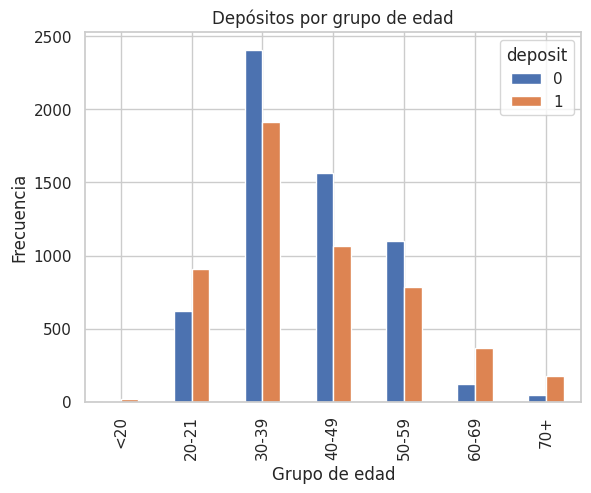

In [773]:
Age_deposit.drop('All', axis=0).plot(kind='bar')
plt.title('Depósitos por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.show()

In [774]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,50-59
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,50-59
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,40-49
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,50-59
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,50-59


In [775]:
import numpy as np


In [776]:
Data['deposit_1'] = np.where(Data['deposit'] == 1, 1, 0)
Data['deposit_0'] = np.where(Data['deposit'] == 0, 1, 0)

In [777]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,50-59,1,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,50-59,1,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,40-49,1,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,50-59,1,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,50-59,1,0


In [778]:
Data['balance_status'] = pd.cut(Data['balance'],
                                   bins=[-np.inf, 0, np.inf],
                                   labels=['Negativo', 'Positivo'])

In [779]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0,balance_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,50-59,1,0,Positivo
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,50-59,1,0,Positivo
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,40-49,1,0,Positivo
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,50-59,1,0,Positivo
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,50-59,1,0,Positivo


In [780]:
balance_deposit= pd.crosstab(Data['balance_status'], Data['deposit'], margins=True)

In [781]:
balance_deposit.head()

deposit,0,1,All
balance_status,,,
Negativo,960,502,1462
Positivo,4913,4787,9700
All,5873,5289,11162


In [782]:
del balance_deposit['All']

In [783]:
balance_deposit.head()

deposit,0,1
balance_status,,
Negativo,960,502
Positivo,4913,4787
All,5873,5289


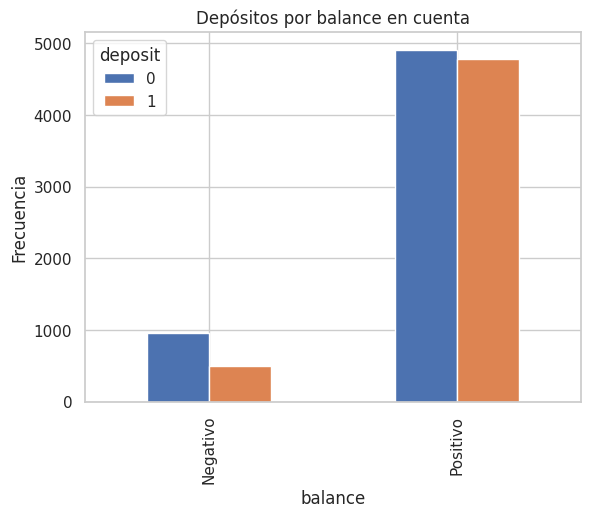

In [784]:
balance_deposit.drop('All', axis=0).plot(kind='bar')
plt.title('Depósitos por balance en cuenta')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

Age-balance

In [785]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0,balance_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,50-59,1,0,Positivo
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,50-59,1,0,Positivo
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,40-49,1,0,Positivo
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,50-59,1,0,Positivo
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,50-59,1,0,Positivo


In [786]:
 age_balance = pd.crosstab(Data['age_group'], Data['balance_status'], margins=True)

In [787]:
print(age_balance)

balance_status  Negativo  Positivo    All
age_group                                
<20                    0        21     21
20-21                165      1365   1530
30-39                562      3756   4318
40-49                419      2209   2628
50-59                260      1625   1885
60-69                 39       445    484
70+                   11       213    224
All                 1456      9634  11090


In [788]:
del age_balance['All']

In [789]:
print(age_balance)

balance_status  Negativo  Positivo
age_group                         
<20                    0        21
20-21                165      1365
30-39                562      3756
40-49                419      2209
50-59                260      1625
60-69                 39       445
70+                   11       213
All                 1456      9634


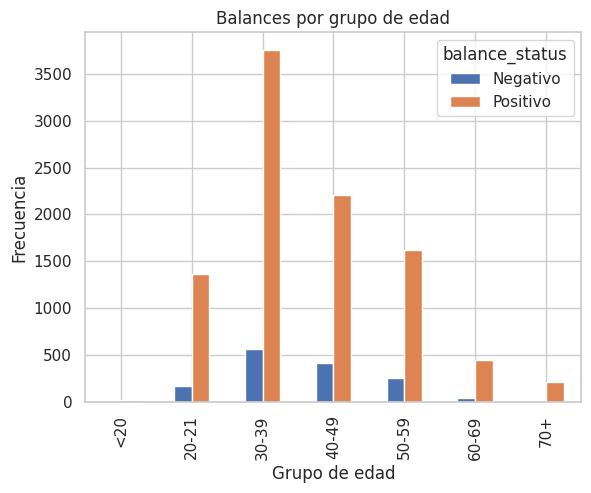

In [790]:
age_balance.drop('All', axis=0).plot(kind='bar')
plt.title('Balances por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.show()

Job-Deposit

In [791]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0,balance_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,50-59,1,0,Positivo
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,50-59,1,0,Positivo
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,40-49,1,0,Positivo
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,50-59,1,0,Positivo
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,50-59,1,0,Positivo


In [792]:
Job_depsoit= pd.crosstab(Data['job'], Data['deposit'], margins=True)

In [793]:
Job_depsoit.head()

deposit,0,1,All
job,,,
admin.,703,631,1334
blue-collar,1236,708,1944
entrepreneur,205,123,328
housemaid,165,109,274
management,1265,1301,2566


In [794]:
del Job_depsoit['All']

In [795]:
Job_depsoit.head()

deposit,0,1
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301


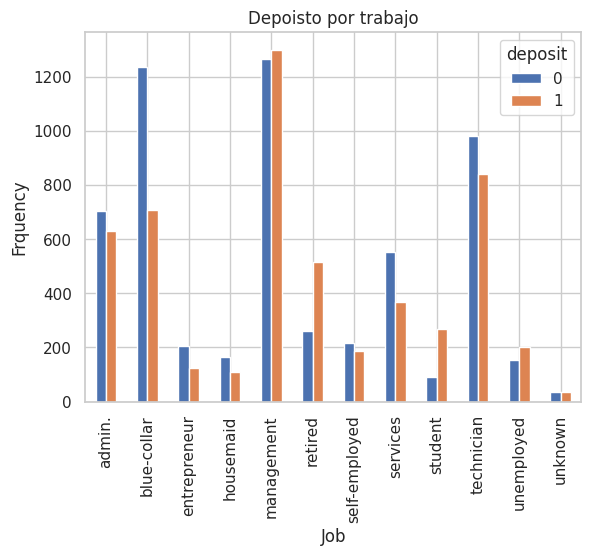

In [796]:
Job_depsoit.drop('All', axis=0).plot(kind='bar')
plt.title('Depoisto por trabajo')
plt.xlabel('Job')
plt.ylabel('Frquency')
plt.show()

Age-job

In [797]:
Data['age_group'].head()

,age_group
0,50-59
1,50-59
2,40-49
3,50-59
4,50-59


In [798]:
jobs30= Data[Data['age_group'].isin(['30-39'])]


In [799]:
jobs40= Data[Data['age_group'].isin(['40-49'])]


In [800]:
jobs50= Data[Data['age_group'].isin(['50-59'])]


In [801]:
job_30 = jobs30['job'].value_counts()


In [802]:
job_40 = jobs40['job'].value_counts()

In [803]:
job_50 = jobs50['job'].value_counts()

In [804]:
print(job_30, job_40,job_50)

job
management       1183
technician        862
blue-collar       750
admin.            547
services          418
self-employed     166
entrepreneur      125
unemployed        122
student            65
housemaid          65
unknown            12
retired             3
Name: count, dtype: int64 job
management       596
blue-collar      592
technician       444
admin.           344
services         229
unemployed       108
entrepreneur     103
self-employed     92
housemaid         73
unknown           24
retired           17
student            6
Name: count, dtype: int64 job
management       450
blue-collar      289
technician       264
retired          232
admin.           205
services         119
housemaid         91
entrepreneur      78
unemployed        76
self-employed     59
unknown           22
Name: count, dtype: int64


In [805]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0,balance_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,50-59,1,0,Positivo
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,50-59,1,0,Positivo
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,40-49,1,0,Positivo
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,50-59,1,0,Positivo
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,50-59,1,0,Positivo


marital

In [806]:
Marital_deposit= pd.crosstab(Data['marital'], Data['deposit'], margins=True)

In [807]:
print(Marital_deposit)

deposit      0     1    All
marital                    
divorced   671   622   1293
married   3596  2755   6351
single    1606  1912   3518
All       5873  5289  11162


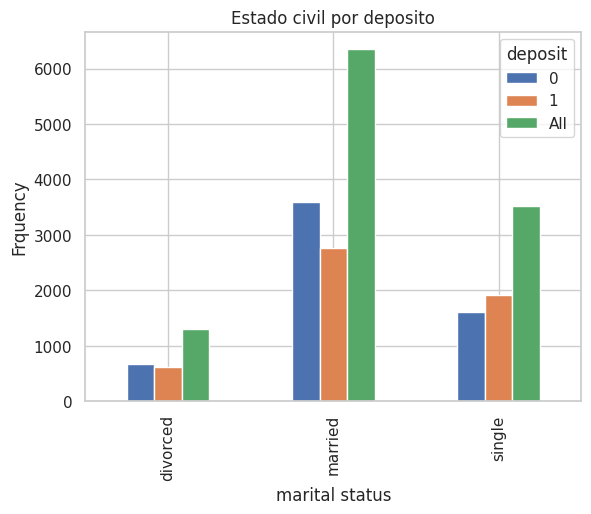

In [808]:
Marital_deposit.drop('All', axis=0).plot(kind='bar')
plt.title('Estado civil por deposito')
plt.xlabel('marital status')
plt.ylabel('Frquency')
plt.show()

Education-deposit

In [809]:
education_deposit= pd.crosstab(Data['education'], Data['deposit'], margins=True)

In [810]:
print(education_deposit)

deposit       0     1    All
education                   
primary     909   591   1500
secondary  3026  2450   5476
tertiary   1693  1996   3689
unknown     245   252    497
All        5873  5289  11162


In [811]:
del education_deposit['All']

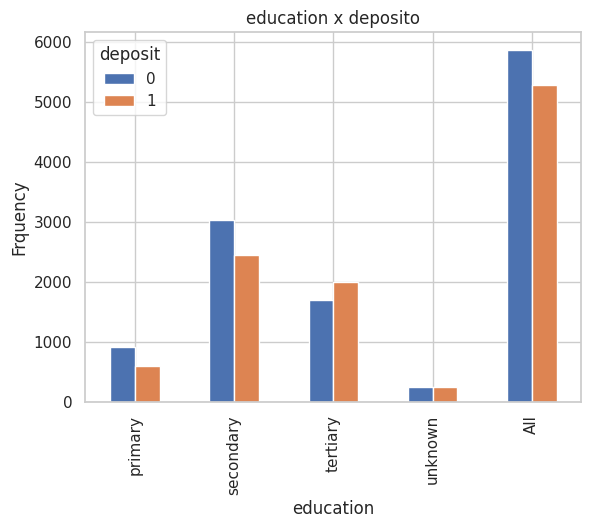

In [812]:
education_deposit.plot(kind='bar')
plt.title('education x deposito')
plt.xlabel('education')
plt.ylabel('Frquency')
plt.show()

Previous deposit

In [813]:
previous_depsoit= pd.crosstab(Data['previous'], Data['deposit'], margins=True)

In [814]:
print(previous_depsoit)

deposit      0     1    All
previous                   
0         4940  3384   8324
1          304   583    887
2          237   456    693
3          141   294    435
4           73   171    244
5           44   121    165
6           34    83    117
7           23    54     77
8           21    39     60
9           10    24     34
10           4    26     30
11           8    15     23
12           6    10     16
13           2     9     11
14           1     5      6
15           4     1      5
16           2     0      2
17           8     3     11
18           1     0      1
19           2     2      4
20           1     1      2
21           0     1      1
22           0     1      1
23           1     1      2
26           0     1      1
27           2     0      2
28           1     0      1
29           0     1      1
30           0     1      1
37           1     0      1
40           1     0      1
41           1     0      1
55           0     1      1
58           0     1

Default

In [815]:
Data['default'].isnull().sum()

0

In [816]:
Data['default'].unique()

array(['no', 'yes'], dtype=object)

In [817]:
default_deposit= pd.crosstab(Data['default'], Data['deposit'], margins=True)

In [818]:
print(default_deposit)

deposit     0     1    All
default                   
no       5757  5237  10994
yes       116    52    168
All      5873  5289  11162


In [819]:
del default_deposit['All']

In [820]:
print(default_deposit)

deposit     0     1
default            
no       5757  5237
yes       116    52
All      5873  5289


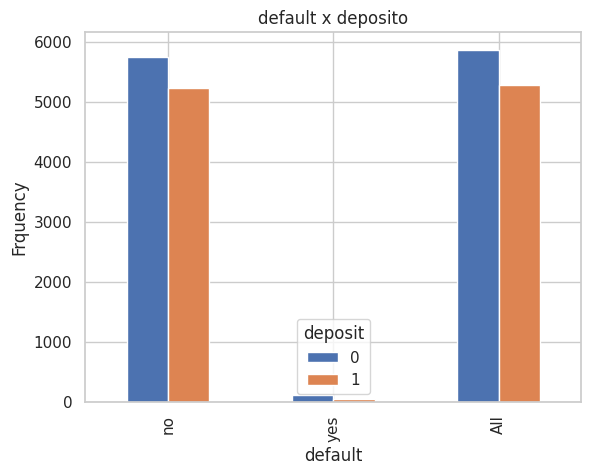

In [821]:
default_deposit.plot(kind='bar')
plt.title('default x deposito')
plt.xlabel('default')
plt.ylabel('Frquency')
plt.show()

In [822]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_1,deposit_0,balance_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,1,50-59,1,0,Positivo
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,1,50-59,1,0,Positivo
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,1,40-49,1,0,Positivo
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,1,50-59,1,0,Positivo
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,1,50-59,1,0,Positivo


housing

In [823]:
housing_deposit= pd.crosstab(Data['housing'], Data['deposit'], margins=False)

In [824]:
print(housing_deposit)

deposit     0     1
housing            
no       2527  3354
yes      3346  1935


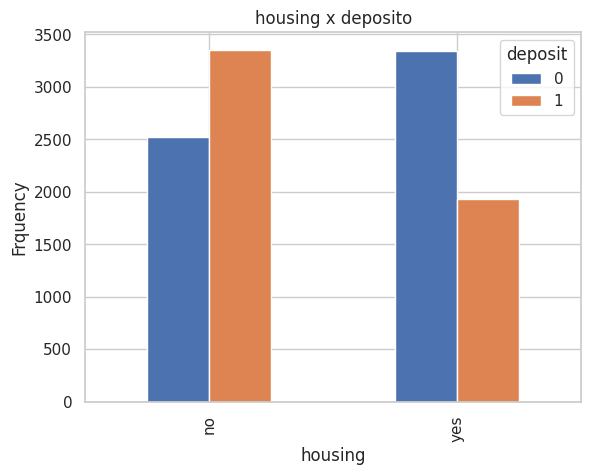

In [825]:
housing_deposit.plot(kind='bar')
plt.title('housing x deposito')
plt.xlabel('housing')
plt.ylabel('Frquency')
plt.show()

Loan

In [826]:
loan_depsoit= pd.crosstab(Data['loan'], Data['deposit'], margins=False)

In [827]:
print(loan_depsoit)

deposit     0     1
loan               
no       4897  4805
yes       976   484


campaign

In [828]:
Data['campaign'].isnull().sum()

0

In [829]:
Data['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31])

In [830]:
campaign_deposit= pd.crosstab(Data['campaign'], Data['deposit'], margins=False)

In [831]:
print(campaign_deposit)

deposit      0     1
campaign            
1         2237  2561
2         1627  1401
3          703   618
4          454   317
5          239   139
6          173    92
7           92    47
8           96    32
9           51    21
10          38    14
11          24    16
12          25     4
13          24     6
14          11     4
15           9     4
16           7     2
17           8     6
18           8     0
19           5     0
20           4     1
21           7     1
22           4     0
23           3     0
24           4     1
25           3     0
26           3     0
27           1     0
28           1     0
29           1     1
30           4     0
31           1     0
32           1     1
33           1     0
41           1     0
43           2     0
63           1     0


Month

In [832]:
Data['month'].isnull().sum()

0

In [833]:
Data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [834]:
deposit_filtered = Data[Data['deposit'] == 1]


In [835]:
deposit_count_by_month = deposit_filtered['month'].value_counts().sort_index()


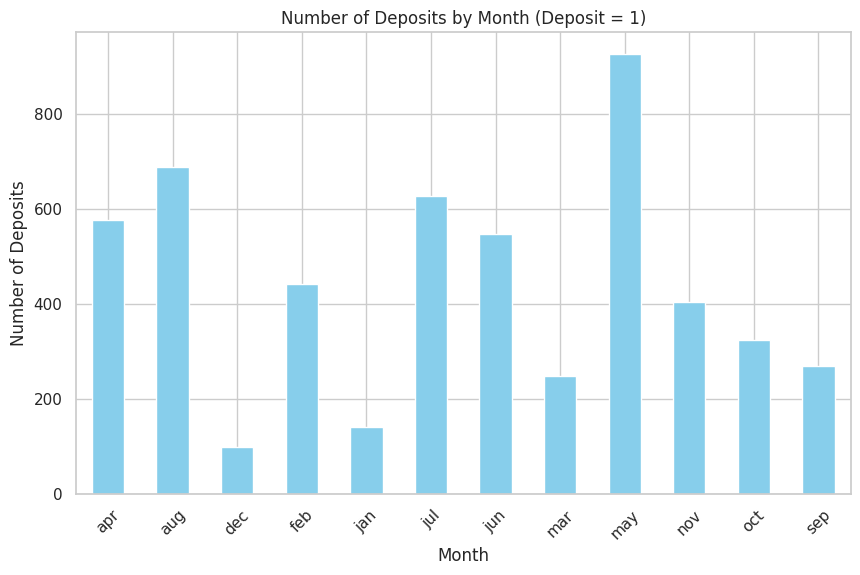

In [836]:
deposit_count_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Deposits by Month (Deposit = 1)')
plt.xlabel('Month')
plt.ylabel('Number of Deposits')
plt.xticks(rotation=45)
plt.show()

#Predicciones  

Mis propias variables

Edades 30-29/40-49/-50-59
Job Management technician Blue collar
Marital Married Single
Education Secundary Tertiary
Balance Postivo
Housing No
Loan No
Default No
Previuous 0

Transformando los datos

In [837]:
data_2= Data.copy()

In [838]:
data_2.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [839]:
most_frequent_age_group = data_2['age_group'].mode()[0]
data_2['age_group'] = data_2['age_group'].fillna(most_frequent_age_group)

Transofrmando datos

In [840]:
data_2 = pd.get_dummies(data_2, columns=['job', 'marital', 'education', 'housing',
                                           'loan', 'default', 'balance_status',
                                           'age_group', 'poutcome'], drop_first=False)

In [841]:
print("Columnas en data_2:", data_2.columns.tolist())


Columnas en data_2: ['age', 'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit', 'deposit_1', 'deposit_0', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'default_no', 'default_yes', 'balance_status_Negativo', 'balance_status_Positivo', 'age_group_<20', 'age_group_20-21', 'age_group_30-39', 'age_group_40-49', 'age_group_50-59', 'age_group_60-69', 'age_group_70+', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [842]:
data_2 = data_2.drop(columns= ['age','contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous','balance', 'deposit_0', 'deposit_1', 'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_unemployed', 'job_unknown', 'marital_divorced',  'education_primary',  'education_unknown', 'housing_yes', 'loan_yes', 'default_yes', 'balance_status_Negativo', 'age_group_<20', 'age_group_20-21', 'age_group_60-69', 'age_group_70+', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown'])

In [843]:
print("Columnas en data_2:", data_2.columns.tolist())


Columnas en data_2: ['deposit', 'job_blue-collar', 'job_management', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_no', 'loan_no', 'default_no', 'balance_status_Positivo', 'age_group_30-39', 'age_group_40-49', 'age_group_50-59', 'poutcome_success']


In [844]:
y = data_2['deposit']

In [845]:
X = data_2.drop(columns=['deposit'])

In [846]:
print(X.dtypes)


job_blue-collar            bool
job_management             bool
job_technician             bool
marital_married            bool
marital_single             bool
education_secondary        bool
education_tertiary         bool
housing_no                 bool
loan_no                    bool
default_no                 bool
balance_status_Positivo    bool
age_group_30-39            bool
age_group_40-49            bool
age_group_50-59            bool
poutcome_success           bool
dtype: object


In [847]:
X = X.astype(int)


In [848]:
print(X.dtypes)


job_blue-collar            int64
job_management             int64
job_technician             int64
marital_married            int64
marital_single             int64
education_secondary        int64
education_tertiary         int64
housing_no                 int64
loan_no                    int64
default_no                 int64
balance_status_Positivo    int64
age_group_30-39            int64
age_group_40-49            int64
age_group_50-59            int64
poutcome_success           int64
dtype: object


In [849]:
print(y.dtypes)


int64


Regresion logistica

In [850]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [851]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [852]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [853]:
y_pred = model.predict(X_test)


In [854]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[955 211]
 [533 534]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1166
           1       0.72      0.50      0.59      1067

    accuracy                           0.67      2233
   macro avg       0.68      0.66      0.65      2233
weighted avg       0.68      0.67      0.66      2233



In [855]:
from sklearn.metrics import accuracy_score


In [856]:
accuracy = accuracy_score(y_test, y_pred)


In [857]:
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 66.68%


#A/B testing : comprobar causalidad

In [858]:
import pandas as pd
from scipy import stats

In [859]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deposit                  11162 non-null  int64
 1   job_blue-collar          11162 non-null  bool 
 2   job_management           11162 non-null  bool 
 3   job_technician           11162 non-null  bool 
 4   marital_married          11162 non-null  bool 
 5   marital_single           11162 non-null  bool 
 6   education_secondary      11162 non-null  bool 
 7   education_tertiary       11162 non-null  bool 
 8   housing_no               11162 non-null  bool 
 9   loan_no                  11162 non-null  bool 
 10  default_no               11162 non-null  bool 
 11  balance_status_Positivo  11162 non-null  bool 
 12  age_group_30-39          11162 non-null  bool 
 13  age_group_40-49          11162 non-null  bool 
 14  age_group_50-59          11162 non-null  bool 
 15  po

Coeficientes

In [860]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
})

In [861]:
print(coefficients.sort_values(by='Coeficiente', ascending=False))

                   Variable  Coeficiente
14         poutcome_success     2.394538
7                housing_no     0.584916
8                   loan_no     0.414875
6        education_tertiary     0.393478
10  balance_status_Positivo     0.325112
9                default_no     0.227577
5       education_secondary     0.102837
2            job_technician    -0.031597
1            job_management    -0.084978
4            marital_single    -0.112511
0           job_blue-collar    -0.123940
3           marital_married    -0.235329
11          age_group_30-39    -0.606518
12          age_group_40-49    -0.760982
13          age_group_50-59    -0.815765


Education

In [862]:
group_A8 = data_2[data_2['education_secondary'] == True]

In [863]:
group_B8 = data_2[(data_2['education_tertiary'] == False)]

In [864]:
rate_A8 = group_A8['deposit'].mean()
rate_B8 = group_B8['deposit'].mean()

In [865]:
t_stat8, p_value8 = stats.ttest_ind(group_A8['deposit'], group_B8['deposit'], equal_var=False)


In [866]:
print(f'Tasa de depósitos (marital_married): {rate_A8:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B8:.2f}')
print(f'Valor p: {p_value8:.4f}')

Tasa de depósitos (marital_married): 0.45
Tasa de depósitos (otros grupos): 0.44
Valor p: 0.4449


In [867]:
if p_value8 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

No se rechaza la hipótesis nula: no hay una diferencia significativa.


Marital

In [868]:
group_A7 = data_2[data_2['marital_married'] == True]

In [869]:
group_B7 = data_2[(data_2['marital_single'] == False)]

In [870]:
rate_A7 = group_A7['deposit'].mean()
rate_B7 = group_B7['deposit'].mean()

In [871]:
t_stat7, p_value7 = stats.ttest_ind(group_A7['deposit'], group_B7['deposit'], equal_var=False)


In [872]:
print(f'Tasa de depósitos (marital_married): {rate_A7:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B7:.2f}')
print(f'Valor p: {p_value7:.4f}')

Tasa de depósitos (marital_married): 0.43
Tasa de depósitos (otros grupos): 0.44
Valor p: 0.3426


In [873]:
if p_value7 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

No se rechaza la hipótesis nula: no hay una diferencia significativa.


job_management

In [874]:
group_A4 = data_2[data_2['job_management'] == True]


In [875]:
group_B4 = data_2[(data_2['job_technician'] == False) & (data_2['job_blue-collar'] == False)]

In [876]:
rate_A4 = group_A4['deposit'].mean()
rate_B4 = group_B4['deposit'].mean()

In [877]:
t_stat4, p_value4 = stats.ttest_ind(group_A4['deposit'], group_B4['deposit'], equal_var=False)


In [878]:
print(f'Tasa de depósitos (job_management): {rate_A4:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B4:.2f}')
print(f'Valor p: {p_value4:.4f}')

Tasa de depósitos (job_management): 0.51
Tasa de depósitos (otros grupos): 0.51
Valor p: 0.9213


In [879]:
if p_value4 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

No se rechaza la hipótesis nula: no hay una diferencia significativa.


job_technician

In [880]:
group_A5 = data_2[data_2['job_technician'] == True]


In [881]:
group_B5 = data_2[(data_2['job_management'] == False) & (data_2['job_blue-collar'] == False)]

In [882]:
rate_A5 = group_A5['deposit'].mean()
rate_B5 = group_B5['deposit'].mean()

In [883]:
t_stat5, p_value5 = stats.ttest_ind(group_A5['deposit'], group_B5['deposit'], equal_var=False)


In [884]:
print(f'Tasa de depósitos (job_technician): {rate_A5:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B5:.2f}')
print(f'Valor p: {p_value5:.4f}')

Tasa de depósitos (job_technician): 0.46
Tasa de depósitos (otros grupos): 0.49
Valor p: 0.0144


In [885]:
if p_value5 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

Se rechaza la hipótesis nula: hay una diferencia significativa.


job_blue-collar

In [886]:
group_A6 = data_2[data_2['job_blue-collar'] == True]


In [887]:
group_B6 = data_2[(data_2['job_management'] == False) & (data_2['job_technician'] == False)]

In [888]:
rate_A6 = group_A6['deposit'].mean()
rate_B6 = group_B6['deposit'].mean()

In [889]:
t_stat6, p_value6 = stats.ttest_ind(group_A6['deposit'], group_B6['deposit'], equal_var=False)


In [890]:
print(f'Tasa de depósitos (job_blue-collar): {rate_A6:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B6:.2f}')
print(f'Valor p: {p_value6:.4f}')

Tasa de depósitos (job_blue-collar): 0.36
Tasa de depósitos (otros grupos): 0.46
Valor p: 0.0000


In [891]:
if p_value6 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

Se rechaza la hipótesis nula: hay una diferencia significativa.


Age 30-39

In [892]:
group_A = data_2[data_2['age_group_30-39'] == True]


In [893]:
group_B = data_2[(data_2['age_group_40-49'] == False) & (data_2['age_group_50-59'] == False)]

In [894]:
rate_A = group_A['deposit'].mean()
rate_B = group_B['deposit'].mean()

In [895]:
t_stat, p_value = stats.ttest_ind(group_A['deposit'], group_B['deposit'], equal_var=False)


In [896]:
print(f'Tasa de depósitos (30-39 años): {rate_A:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B:.2f}')
print(f'Valor p: {p_value:.4f}')

Tasa de depósitos (30-39 años): 0.45
Tasa de depósitos (otros grupos): 0.52
Valor p: 0.0000


In [897]:
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

Se rechaza la hipótesis nula: hay una diferencia significativa.


Age 40-49

In [898]:
group_A2 = data_2[data_2['age_group_40-49'] == True]


In [899]:
group_B2 = data_2[(data_2['age_group_30-39'] == False) & (data_2['age_group_50-59'] == False)]

In [900]:
rate_A2 = group_A2['deposit'].mean()
rate_B2 = group_B2['deposit'].mean()

In [901]:
t_stat2, p_value2 = stats.ttest_ind(group_A2['deposit'], group_B2['deposit'], equal_var=False)


In [902]:
print(f'Tasa de depósitos (40-49 años): {rate_A2:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B2:.2f}')
print(f'Valor p: {p_value2:.4f}')

Tasa de depósitos (40-49 años): 0.40
Tasa de depósitos (otros grupos): 0.52
Valor p: 0.0000


In [903]:
if p_value2 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

Se rechaza la hipótesis nula: hay una diferencia significativa.


Age 50-59

In [904]:
group_A3 = data_2[data_2['age_group_50-59'] == True]


In [905]:
group_B3 = data_2[(data_2['age_group_30-39'] == False) & (data_2['age_group_40-49'] == False)]

In [906]:
rate_A3 = group_A3['deposit'].mean()
rate_B3 = group_B3['deposit'].mean()

In [907]:
t_stat3, p_value3 = stats.ttest_ind(group_A3['deposit'], group_B3['deposit'], equal_var=False)


In [908]:
print(f'Tasa de depósitos (50-59 años): {rate_A3:.2f}')
print(f'Tasa de depósitos (otros grupos): {rate_B3:.2f}')
print(f'Valor p: {p_value3:.4f}')

Tasa de depósitos (50-59 años): 0.42
Tasa de depósitos (otros grupos): 0.54
Valor p: 0.0000


In [909]:
if p_value3 < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa.")

Se rechaza la hipótesis nula: hay una diferencia significativa.


#Second Prediction Model

In [910]:
print("Columnas en data_2:", data_2.columns.tolist())


Columnas en data_2: ['deposit', 'job_blue-collar', 'job_management', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_no', 'loan_no', 'default_no', 'balance_status_Positivo', 'age_group_30-39', 'age_group_40-49', 'age_group_50-59', 'poutcome_success']


In [911]:
data_3 = data_2.drop(columns=['education_secondary', 'education_tertiary','marital_married', 'marital_single',  'job_management'])

In [912]:
data_3.head()

,deposit,job_blue-collar,job_technician,housing_no,loan_no,default_no,balance_status_Positivo,age_group_30-39,age_group_40-49,age_group_50-59,poutcome_success
0,1,False,False,False,True,True,True,False,False,True,False
1,1,False,False,True,True,True,True,False,False,True,False
2,1,False,True,False,True,True,True,False,True,False,False
3,1,False,False,False,True,True,True,False,False,True,False
4,1,False,False,True,True,True,True,False,False,True,False


In [913]:
y = data_3['deposit']

In [914]:
X = data_3.drop(columns=['deposit'])

In [915]:
print(X.dtypes)


job_blue-collar            bool
job_technician             bool
housing_no                 bool
loan_no                    bool
default_no                 bool
balance_status_Positivo    bool
age_group_30-39            bool
age_group_40-49            bool
age_group_50-59            bool
poutcome_success           bool
dtype: object


In [916]:
X = X.astype(int)


In [917]:
print(X.dtypes)

job_blue-collar            int64
job_technician             int64
housing_no                 int64
loan_no                    int64
default_no                 int64
balance_status_Positivo    int64
age_group_30-39            int64
age_group_40-49            int64
age_group_50-59            int64
poutcome_success           int64
dtype: object


In [918]:
print(y.dtypes)

int64


Regresión lógistica

In [919]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [921]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [922]:
y_pred = model.predict(X_test)

In [923]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[936 230]
 [515 552]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1166
           1       0.71      0.52      0.60      1067

    accuracy                           0.67      2233
   macro avg       0.68      0.66      0.66      2233
weighted avg       0.67      0.67      0.66      2233



In [924]:
from sklearn.metrics import accuracy_score


In [925]:
accuracy = accuracy_score(y_test, y_pred)


In [926]:
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 66.64%


#Visualization

In [927]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [928]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [929]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

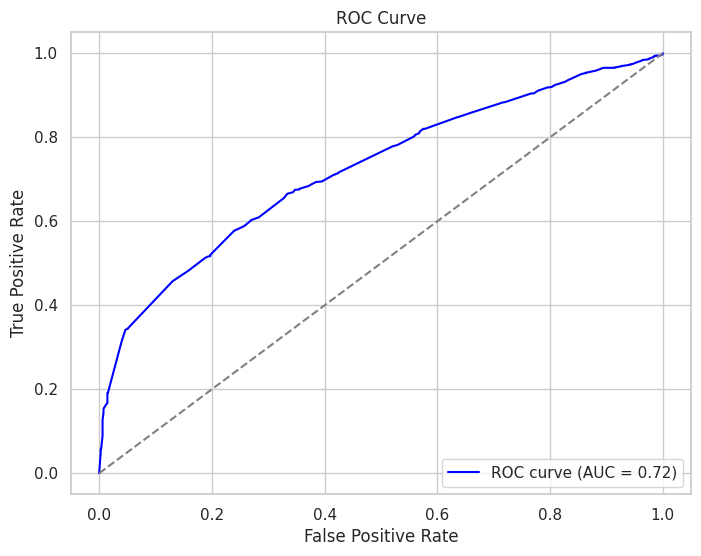

In [930]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()